In [1]:
import os.path as op
from glob import glob

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from PIL import Image
import rasterio as rio

/home/jakelee/micromamba/envs/emit-cloud/lib/python3.10/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


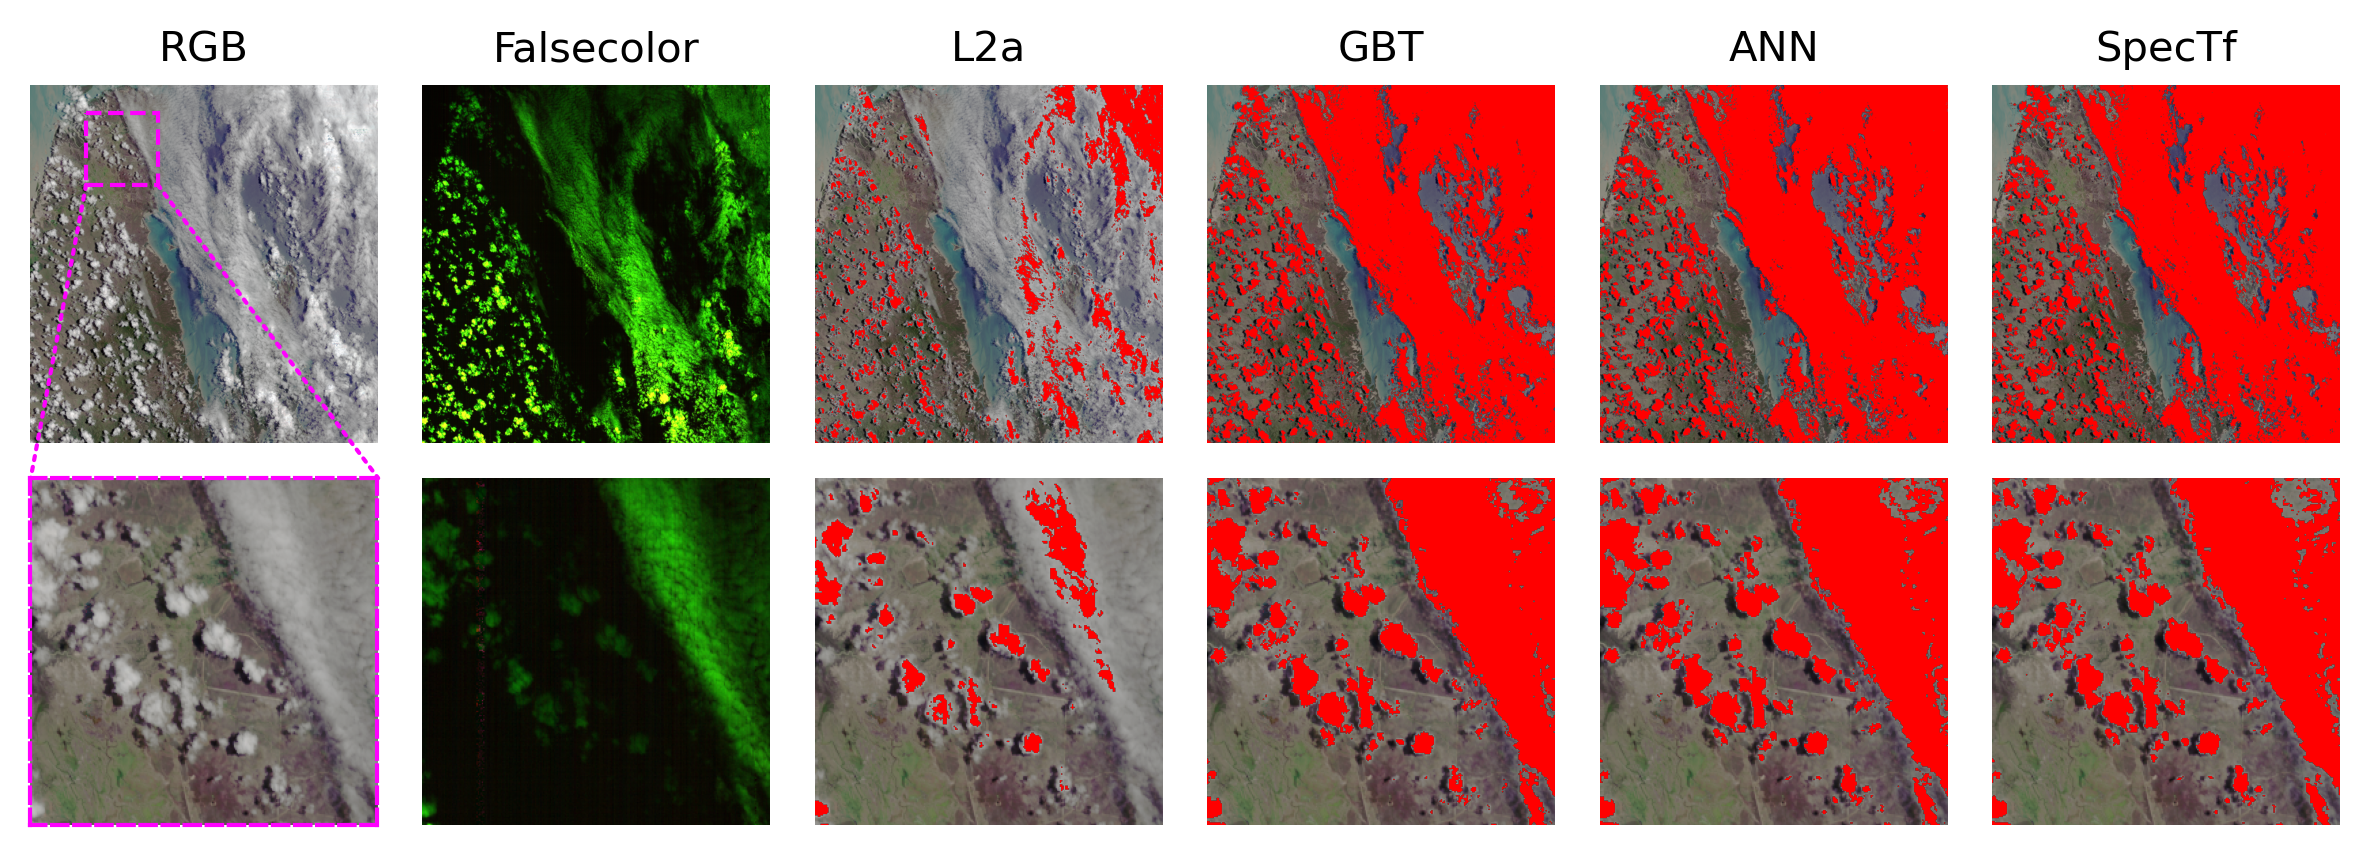

In [2]:
ROOT = "/scratch/jakelee/emit-cloud/outputs/v6_m4/20241016"

fid = "emit20240302t005829"
crop_tl = (100,200)
crop_size = (256, 256)

rgb_path = glob(op.join(ROOT, 'rgb_png', f"{fid}*.png"))[0]
ovl_path = glob(op.join(ROOT, 'overlay_png', f"{fid}*.png"))[0]
l2a_path = glob(op.join(ROOT, 'l2a_mask', f"{fid}*.img"))[0]
#tf_path = glob(op.join(ROOT, 'tf_mask_nodata', f"{fid}*.img"))[0]
tf_path = glob(op.join(ROOT, 'tf_mask', f"{fid}*.img"))[0]
ann_path = glob(op.join(ROOT, 'ann_mask', f"{fid}*.img"))[0]
xgb_path = glob(op.join(ROOT, 'xgb_mask', f"{fid}*.img"))[0]

rgb_arr = np.array(Image.open(rgb_path))
ovl_arr = np.array(Image.open(ovl_path))
l2a_arr = rio.open(l2a_path).read()
l2a_arr = l2a_arr.transpose(1,2,0)
tf_arr = rio.open(tf_path).read(1)
ann_arr = rio.open(ann_path).read(1)
xgb_arr = rio.open(xgb_path).read(1)

fig, axs = plt.subplots(nrows=2, ncols=6, figsize=(8, 3), dpi=300)

ax_a_1 = axs[0,0]
ax_a_1.axis('off')
ax_a_1.set_title("RGB", fontsize=10)
ax_a_1.imshow(rgb_arr)

ax_b_1 = axs[0,1]
ax_b_1.axis('off')
ax_b_1.set_title("Falsecolor", fontsize=10)
ax_b_1.imshow(ovl_arr)

ax_c_1 = axs[0,2]
ax_c_1.axis('off')
ax_c_1.set_title("L2a", fontsize=10)

ax_c_1.imshow(rgb_arr, zorder=1)
l2a_img = np.zeros((l2a_arr.shape[0], l2a_arr.shape[1], 4)).astype(float)
l2a_img[:,:,0] = l2a_arr[:,:,0] | l2a_arr[:,:,1]
l2a_img[:,:,3] = l2a_img[:,:,0]
ax_c_1.imshow(l2a_img, zorder=2)

ax_d_1 = axs[0,3]
ax_d_1.axis('off')
ax_d_1.set_title("GBT", fontsize=10)

ax_d_1.imshow(rgb_arr, zorder=1)
xgb_img = np.zeros((xgb_arr.shape[0], xgb_arr.shape[1], 4)).astype(float)
xgb_img[:,:,0] = xgb_arr >= 0.96
xgb_img[:,:,3] = xgb_img[:,:,0]
ax_d_1.imshow(xgb_img, zorder=2)

ax_e_1 = axs[0,4]
ax_e_1.axis('off')
ax_e_1.set_title("ANN", fontsize=10)

ax_e_1.imshow(rgb_arr, zorder=1)
ann_img = np.zeros((ann_arr.shape[0], ann_arr.shape[1], 4)).astype(float)
ann_img[:,:,0] = ann_arr >= 0.98
ann_img[:,:,3] = ann_img[:,:,0]
ax_e_1.imshow(ann_img, zorder=2)

ax_f_1 = axs[0,5]
ax_f_1.axis('off')
ax_f_1.set_title("SpecTf", fontsize=10)

ax_f_1.imshow(rgb_arr, zorder=1)
tf_img = np.zeros((tf_arr.shape[0], tf_arr.shape[1], 4)).astype(float)
tf_img[:,:,0] = tf_arr >= 0.52
tf_img[:,:,3] = tf_img[:,:,0]
ax_f_1.imshow(tf_img, zorder=2)

rect = patches.Rectangle(crop_tl[::-1], crop_size[0], crop_size[1], linewidth=1, linestyle='--', edgecolor='magenta', facecolor='none')
ax_a_1.add_patch(rect)

c1 = crop_tl[0]
c2 = crop_tl[0] + crop_size[0]
c3 = crop_tl[1]
c4 = crop_tl[1] + crop_size[1]


ax_a_2 = axs[1,0]
ax_a_2.imshow(rgb_arr[c1:c2,c3:c4])

ax_a_2.axis('on')
ax_a_2.set_xticks([])
ax_a_2.set_yticks([])

for spine in ax_a_2.spines.values():
    spine.set_linestyle('--')
    spine.set_linewidth(1)
    spine.set_color('magenta')

con1 = patches.ConnectionPatch(xyA=(c3,c2), coordsA=ax_a_1.transData, 
                       xyB=(0,0), coordsB=ax_a_2.transData, color='magenta', linestyle=':')
con2 = patches.ConnectionPatch(xyA=(c4,c2), coordsA=ax_a_1.transData, 
                       xyB=(256,0), coordsB=ax_a_2.transData, color='magenta', linestyle=':')
fig.add_artist(con1)
fig.add_artist(con2)

ax_b_2 = axs[1,1]
ax_b_2.axis('off')
ax_b_2.imshow(ovl_arr[c1:c2,c3:c4])

ax_c_2 = axs[1,2]
ax_c_2.axis('off')
ax_c_2.imshow(rgb_arr[c1:c2,c3:c4], zorder=1)
ax_c_2.imshow(l2a_img[c1:c2,c3:c4], zorder=2)

ax_d_2 = axs[1,3]
ax_d_2.axis('off')
ax_d_2.imshow(rgb_arr[c1:c2,c3:c4], zorder=1)
ax_d_2.imshow(xgb_img[c1:c2,c3:c4], zorder=2)

ax_e_2 = axs[1,4]
ax_e_2.axis('off')
ax_e_2.imshow(rgb_arr[c1:c2,c3:c4], zorder=1)
ax_e_2.imshow(ann_img[c1:c2,c3:c4], zorder=2)

ax_f_2 = axs[1,5]
ax_f_2.axis('off')
ax_f_2.imshow(rgb_arr[c1:c2,c3:c4], zorder=1)
ax_f_2.imshow(tf_img[c1:c2,c3:c4], zorder=2)

plt.tight_layout()
fig.savefig('fig2a.png')

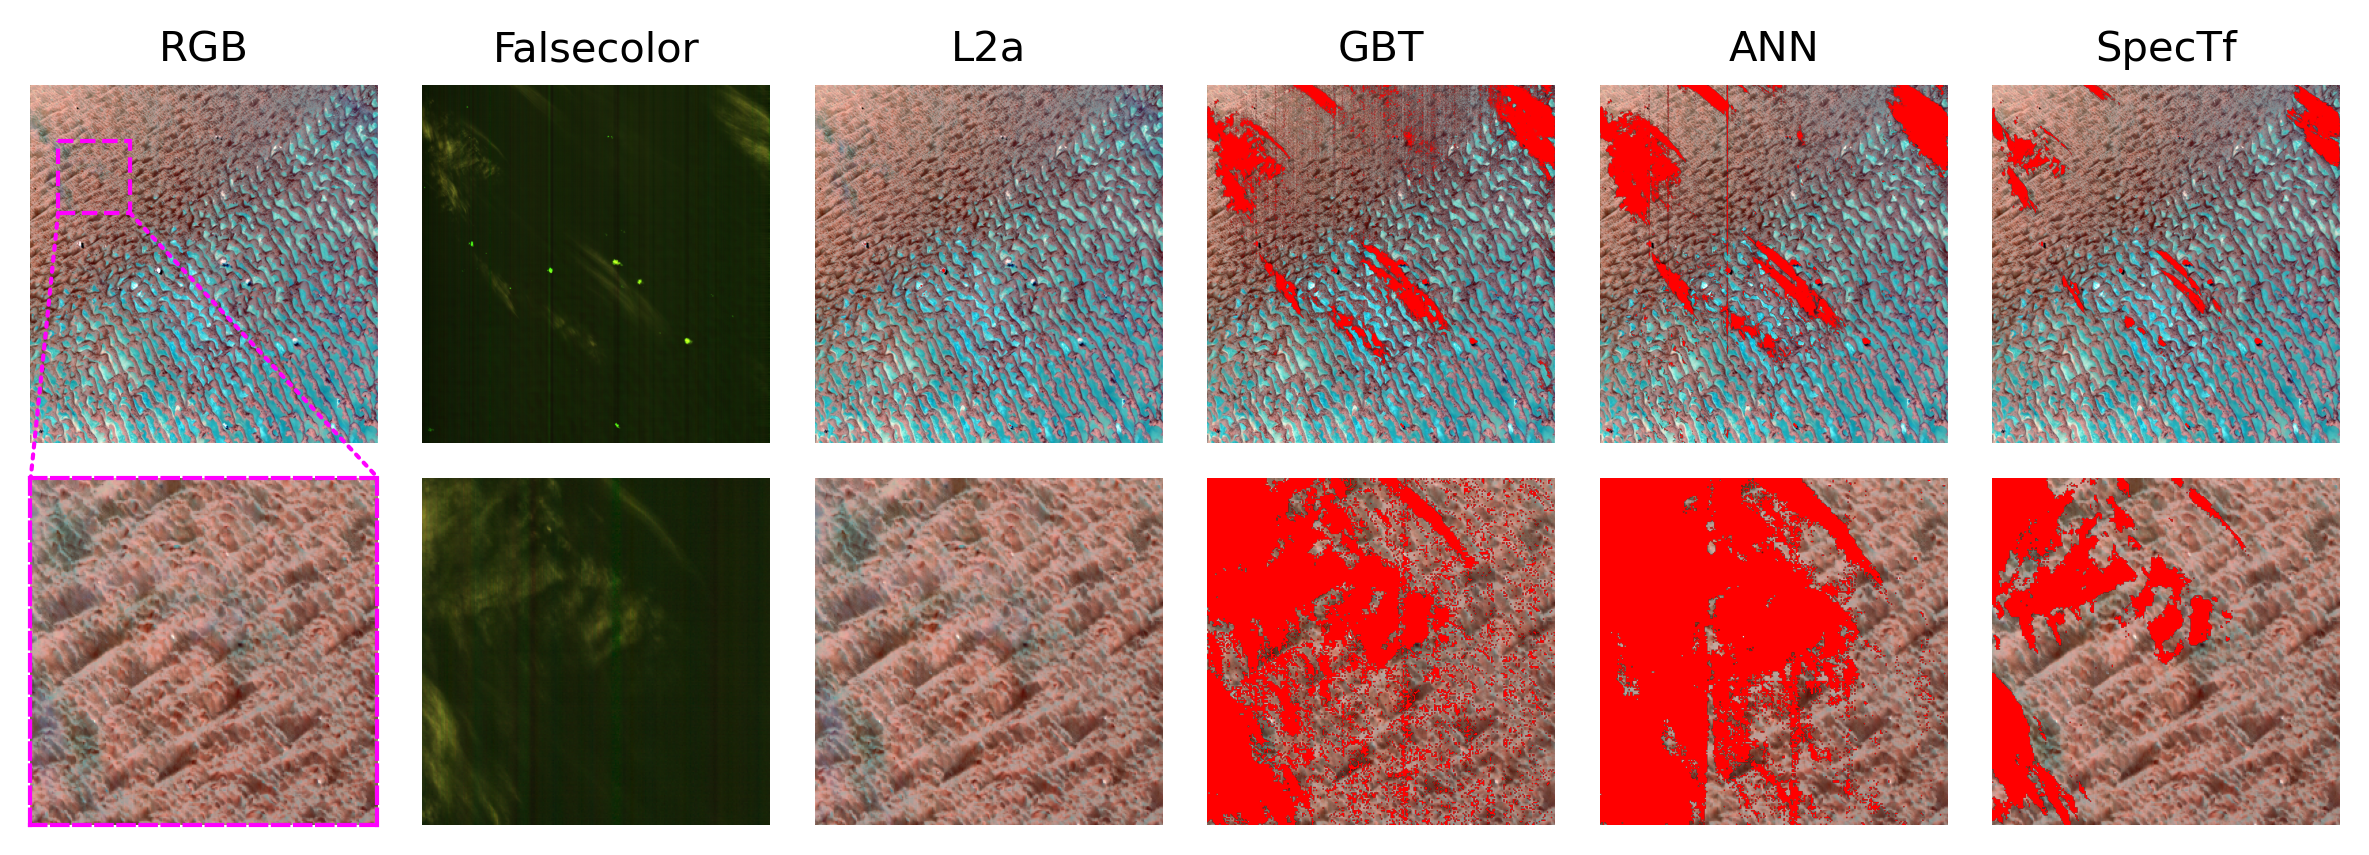

In [3]:
ROOT = "/scratch/jakelee/emit-cloud/outputs/v6_m4/20241016"

fid = "emit20230425t082443"
crop_tl = (200,100)
crop_size = (256, 256)

rgb_path = glob(op.join(ROOT, 'rgb_png', f"{fid}*.png"))[0]
ovl_path = glob(op.join(ROOT, 'overlay_png', f"{fid}*.png"))[0]
l2a_path = glob(op.join(ROOT, 'l2a_mask', f"{fid}*.img"))[0]
#tf_path = glob(op.join(ROOT, 'tf_mask_nodata', f"{fid}*.img"))[0]
tf_path = glob(op.join(ROOT, 'tf_mask', f"{fid}*.img"))[0]
ann_path = glob(op.join(ROOT, 'ann_mask', f"{fid}*.img"))[0]
xgb_path = glob(op.join(ROOT, 'xgb_mask', f"{fid}*.img"))[0]

rgb_arr = np.array(Image.open(rgb_path))
ovl_arr = np.array(Image.open(ovl_path))
l2a_arr = rio.open(l2a_path).read()
l2a_arr = l2a_arr.transpose(1,2,0)
tf_arr = rio.open(tf_path).read(1)
ann_arr = rio.open(ann_path).read(1)
xgb_arr = rio.open(xgb_path).read(1)

fig, axs = plt.subplots(nrows=2, ncols=6, figsize=(8, 3), dpi=300)

ax_a_1 = axs[0,0]
ax_a_1.axis('off')
ax_a_1.set_title("RGB", fontsize=10)
ax_a_1.imshow(rgb_arr)

ax_b_1 = axs[0,1]
ax_b_1.axis('off')
ax_b_1.set_title("Falsecolor", fontsize=10)
ax_b_1.imshow(ovl_arr)

ax_c_1 = axs[0,2]
ax_c_1.axis('off')
ax_c_1.set_title("L2a", fontsize=10)

ax_c_1.imshow(rgb_arr, zorder=1)
l2a_img = np.zeros((l2a_arr.shape[0], l2a_arr.shape[1], 4)).astype(float)
l2a_img[:,:,0] = l2a_arr[:,:,0] | l2a_arr[:,:,1]
l2a_img[:,:,3] = l2a_img[:,:,0]
ax_c_1.imshow(l2a_img, zorder=2)

ax_d_1 = axs[0,3]
ax_d_1.axis('off')
ax_d_1.set_title("GBT", fontsize=10)

ax_d_1.imshow(rgb_arr, zorder=1)
xgb_img = np.zeros((xgb_arr.shape[0], xgb_arr.shape[1], 4)).astype(float)
xgb_img[:,:,0] = xgb_arr >= 0.96
xgb_img[:,:,3] = xgb_img[:,:,0]
ax_d_1.imshow(xgb_img, zorder=2)

ax_e_1 = axs[0,4]
ax_e_1.axis('off')
ax_e_1.set_title("ANN", fontsize=10)

ax_e_1.imshow(rgb_arr, zorder=1)
ann_img = np.zeros((ann_arr.shape[0], ann_arr.shape[1], 4)).astype(float)
ann_img[:,:,0] = ann_arr >= 0.98
ann_img[:,:,3] = ann_img[:,:,0]
ax_e_1.imshow(ann_img, zorder=2)

ax_f_1 = axs[0,5]
ax_f_1.axis('off')
ax_f_1.set_title("SpecTf", fontsize=10)

ax_f_1.imshow(rgb_arr, zorder=1)
tf_img = np.zeros((tf_arr.shape[0], tf_arr.shape[1], 4)).astype(float)
tf_img[:,:,0] = tf_arr >= 0.52
tf_img[:,:,3] = tf_img[:,:,0]
ax_f_1.imshow(tf_img, zorder=2)

rect = patches.Rectangle(crop_tl[::-1], crop_size[0], crop_size[1], linewidth=1, linestyle='--', edgecolor='magenta', facecolor='none')
ax_a_1.add_patch(rect)

c1 = crop_tl[0]
c2 = crop_tl[0] + crop_size[0]
c3 = crop_tl[1]
c4 = crop_tl[1] + crop_size[1]


ax_a_2 = axs[1,0]
ax_a_2.imshow(rgb_arr[c1:c2,c3:c4])

ax_a_2.axis('on')
ax_a_2.set_xticks([])
ax_a_2.set_yticks([])

for spine in ax_a_2.spines.values():
    spine.set_linestyle('--')
    spine.set_linewidth(1)
    spine.set_color('magenta')

con1 = patches.ConnectionPatch(xyA=(c3,c2), coordsA=ax_a_1.transData, 
                       xyB=(0,0), coordsB=ax_a_2.transData, color='magenta', linestyle=':')
con2 = patches.ConnectionPatch(xyA=(c4,c2), coordsA=ax_a_1.transData, 
                       xyB=(256,0), coordsB=ax_a_2.transData, color='magenta', linestyle=':')
fig.add_artist(con1)
fig.add_artist(con2)

ax_b_2 = axs[1,1]
ax_b_2.axis('off')
ax_b_2.imshow(ovl_arr[c1:c2,c3:c4])

ax_c_2 = axs[1,2]
ax_c_2.axis('off')
ax_c_2.imshow(rgb_arr[c1:c2,c3:c4], zorder=1)
ax_c_2.imshow(l2a_img[c1:c2,c3:c4], zorder=2)

ax_d_2 = axs[1,3]
ax_d_2.axis('off')
ax_d_2.imshow(rgb_arr[c1:c2,c3:c4], zorder=1)
ax_d_2.imshow(xgb_img[c1:c2,c3:c4], zorder=2)

ax_e_2 = axs[1,4]
ax_e_2.axis('off')
ax_e_2.imshow(rgb_arr[c1:c2,c3:c4], zorder=1)
ax_e_2.imshow(ann_img[c1:c2,c3:c4], zorder=2)

ax_f_2 = axs[1,5]
ax_f_2.axis('off')
ax_f_2.imshow(rgb_arr[c1:c2,c3:c4], zorder=1)
ax_f_2.imshow(tf_img[c1:c2,c3:c4], zorder=2)

plt.tight_layout()
fig.savefig('fig2b.png')

/tmp/ipykernel_91935/900875661.py:38: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


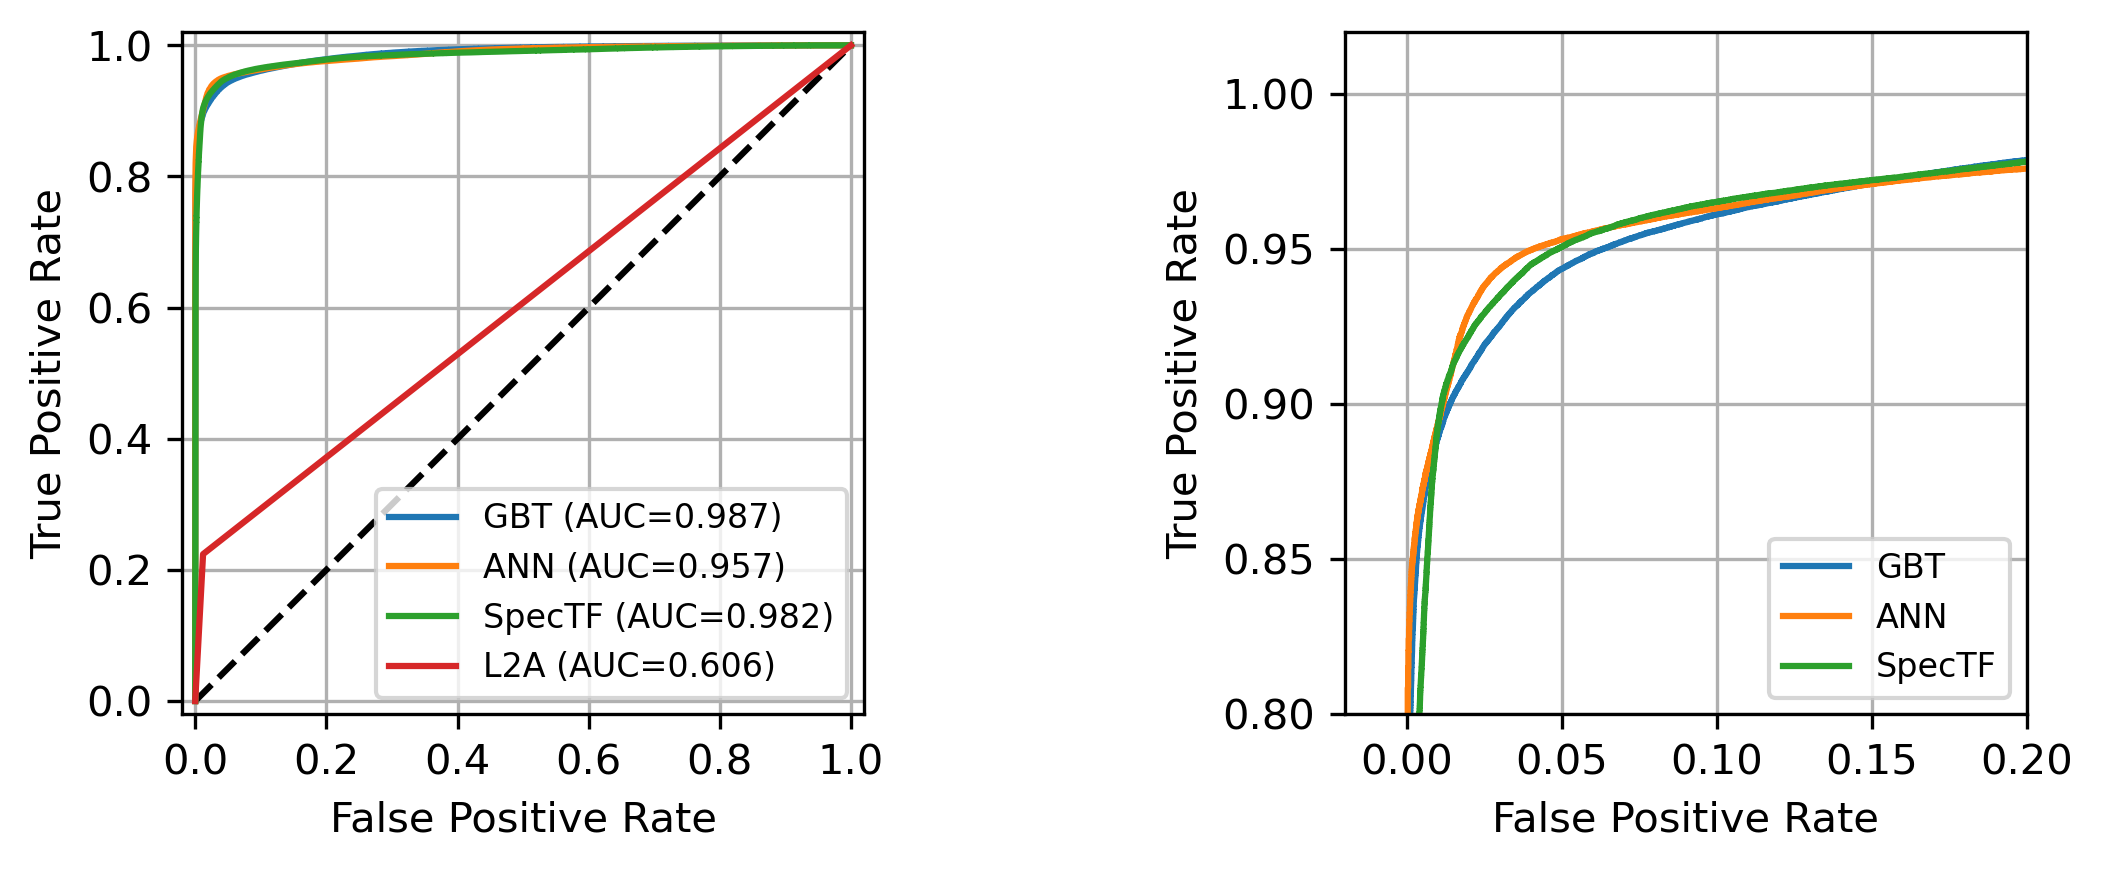

In [4]:
xgb_auc = np.load('xgboost_auc.npy')
ann_auc = np.load('ann_auc.npy')
tf_auc = np.load('tf_auc.npy')

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(8, 3), dpi=300)

ax0.plot([0,1], [0,1], 'k--')
# ax0.step(xgb_auc[0,:], xgb_auc[1,:], label="GBT (AUC=0.987)", where='post')
# ax0.step(ann_auc[0,:], ann_auc[1,:], label="ANN (AUC=0.957)", where='post')
# ax0.step(tf_auc[0,:], tf_auc[1,:], label="SpecTF (AUC=0.982)", where='post')
# ax0.step([0,0.012,1], [0,0.224,1], label="L2A (AUC=0.606)", where='post')

ax0.plot(xgb_auc[0,:], xgb_auc[1,:], label="GBT (AUC=0.987)")
ax0.plot(ann_auc[0,:], ann_auc[1,:], label="ANN (AUC=0.957)")
ax0.plot(tf_auc[0,:], tf_auc[1,:], label="SpecTF (AUC=0.982)")
ax0.plot([0,0.012,1], [0,0.224,1], label="L2A (AUC=0.606)")

ax0.legend(loc='lower right', prop={'size': 8})
ax0.set_xlabel("False Positive Rate")
ax0.set_ylabel("True Positive Rate")
ax0.set_aspect(1)
ax0.set_xticks([0,0.2,0.4,0.6,0.8,1])
ax0.grid(True)
ax0.set_xlim([-0.02,1.02])
ax0.set_ylim([-0.02,1.02])

ax1.step(xgb_auc[0,:], xgb_auc[1,:], label="GBT")
ax1.step(ann_auc[0,:], ann_auc[1,:], label="ANN")
ax1.step(tf_auc[0,:], tf_auc[1,:], label="SpecTF")

ax1.legend(loc='lower right', prop={'size': 8})
ax1.set_xlabel("False Positive Rate")
ax1.set_ylabel("True Positive Rate")
ax1.set_aspect(1)
ax1.grid(True)
ax1.set_xlim([-0.02,0.2])
ax1.set_ylim([0.8,1.02])
fig.show()

plt.tight_layout()

fig.savefig('fig2cd.png')